In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Create a dataset used to verify the validity o four KNN classifier

# Tools:
# 1. Randomizer
# 2. Mask

In [3]:
img = cv2.imread('images/bnw_cat2.jpeg')

print(f'image size: {img.shape}')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# define range of blue color in HSV
lower_black = np.array([0,0,0], dtype=np.uint8)
upper_black = np.array([100,100,100], dtype=np.uint8)

# Create a mask. Threshold the HSV image to get only white colors
mask = cv2.inRange(hsv, lower_black, upper_black)
print(f'Binary mask shape: {mask.shape}')

# Bitwise-AND mask and original image
result = cv2.bitwise_and(img,img, mask= mask)

print(f'Colored mask shape: {result.shape}')

'''
# display the mask and masked image
cv2.imshow('Mask',mask)
cv2.waitKey(0)
#cv2.imshow('Masked Image',result)
#cv2.waitKey(0)
cv2.destroyAllWindows()
'''

image size: (211, 342, 3)
Binary mask shape: (211, 342)
Colored mask shape: (211, 342, 3)


"\n# display the mask and masked image\ncv2.imshow('Mask',mask)\ncv2.waitKey(0)\n#cv2.imshow('Masked Image',result)\n#cv2.waitKey(0)\ncv2.destroyAllWindows()\n"

In [4]:
gauss_noise=np.zeros(img.shape,dtype=np.uint8)
cv2.randn(gauss_noise,128,20)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)
img_2 = cv2.add(img, gauss_noise)

cv2.imshow('',img_2)
cv2.waitKey(0)

gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 30, 200)

contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.imshow('Canny Edges After Contouring', edged)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# 1. Filter the images matrix, find the indexes that gives True
fil_edge = edged.astype(bool)
indices = np.transpose(fil_edge.nonzero()) # Get non zero indices

print(indices.shape)

(1272, 2)


(2, 424)


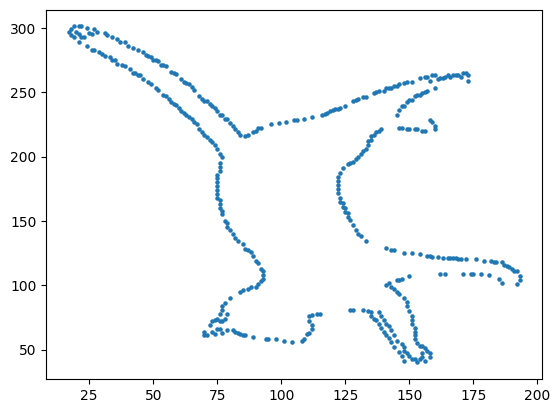

In [6]:
trans_indices = indices.T[:,::3]
print(trans_indices.shape)
# print(trans_indices)
plt.scatter(trans_indices[0], trans_indices[1], s= 5)

In [7]:
data_points_bound_for_csv = trans_indices.T

data_points_bound_for_csv2 = np.append(data_points_bound_for_csv, np.zeros((len(data_points_bound_for_csv), 1), dtype=int), axis = 1)

df = pd.DataFrame(data_points_bound_for_csv)
df = pd.DataFrame(data_points_bound_for_csv2)
df

df.to_csv("cat_w_noise.csv", index=None, header = ['x', 'y', 'class'])

# Generating dataset 2

In [8]:
def rand_circle(R, x_center, y_center, start_rad_coef, end_rad_coef, n):
    
    # starting radian coeff cannot be less than 0
    # ending radian coeff cannot be more than 2
    
    r = np.random.uniform(0, R, n)
    theta = np.pi * np.random.uniform(start_rad_coef, end_rad_coef, n)
    
    return x_center + r * np.cos(theta), y_center + r * np.sin(theta)

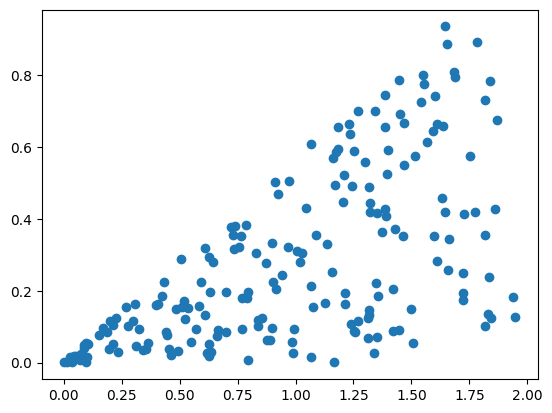

In [9]:
dp_circle = rand_circle(2, 0, 0, 0, 1/6, 200)

plt.scatter(dp_circle[0], dp_circle[1])

,0,1,2
0,-0.084870,1.714752,0.0
1,0.048145,1.975285,0.0
2,0.016728,0.219835,0.0
3,-0.023012,0.637323,0.0
4,-0.384447,1.884754,0.0
...,...,...,...
595,0.346959,-0.489413,2.0
596,1.382448,-0.890046,2.0
597,0.416622,-0.469623,2.0
598,0.947945,-0.836916,2.0


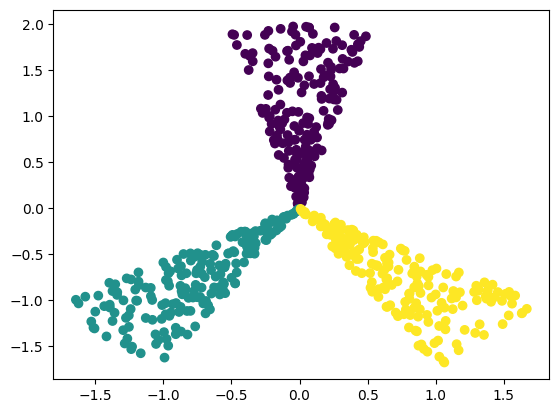

In [10]:
dp_circle_a = np.array(rand_circle(2, 0, 0, 0.4167, 0.583, 200)).T
dp_circle_b = np.array(rand_circle(2, 0, 0, 7/6, 4/3, 200)).T
dp_circle_c = np.array(rand_circle(2, 0, 0, 5/3, 1.833, 200)).T

dp_circle_temp = np.append(dp_circle_a, dp_circle_b, axis = 0)
dp_circle_result = np.append(dp_circle_temp, dp_circle_c, axis = 0)


dp_circle_a_class = np.full((len(dp_circle_a), 1), 0, dtype = int)
dp_circle_b_class = np.full((len(dp_circle_b), 1), 1, dtype = int)
dp_circle_c_class = np.full((len(dp_circle_c), 1), 2, dtype = int)

dp_circle_class_temp = np.append(dp_circle_a_class, dp_circle_b_class, axis = 0)
dp_circle_class_result = np.append(dp_circle_class_temp, dp_circle_c_class, axis = 0)

dp_circle_final_result = np.append(dp_circle_result, dp_circle_class_result, axis = 1)

dp_circle_transpose_final_result = dp_circle_final_result.T

plt.scatter(dp_circle_transpose_final_result[0], dp_circle_transpose_final_result[1], c = dp_circle_transpose_final_result[2])

df2 = pd.DataFrame(dp_circle_final_result)
display(df2)

df2.to_csv("radioactive.csv", index=None, header = ['x', 'y', 'class'])